In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from bs4 import BeautifulSoup
import requests
import math
from urllib.request import urlopen, Request
from sklearn.model_selection import train_test_split

import math 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report, multilabel_confusion_matrix

import seaborn as sns

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import tensorflow as tf

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from keras.layers import Dense, Input, LSTM, GRU, Conv1D, MaxPooling1D, Concatenate, Dropout, Flatten
import string
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tensorflow import keras
from gensim.models import KeyedVectors
from gensim import models

# Library import 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
import sklearn.naive_bayes
from sklearn.model_selection import KFold, ShuffleSplit
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/woojaejo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [127]:
df = pd.read_csv('processed.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)

In [128]:
df

,Text,Sentiment
0,kickers watchlist xide tit soq pnk cpw bpz aj ...,1
1,user aap movie return fea geed indicator trade...,1
2,user afraid short amzn looking like near monop...,1
3,aap user current downtrend break otherwise sho...,-1
4,monday relative weakness nyx win tie tap ice i...,-1
...,...,...
5113,industry body cii said discoms likely suffer n...,-1
5114,gold prices slip rs investors book profits ami...,-1
5115,workers bajaj auto agreed wage cut period apri...,1
5116,sharemarket live sensex day high points nifty ...,1


## Text Vectorizer

In [160]:
X = df['Text']
y = df['Sentiment']

In [130]:
# ML model Training with given vectorized method
def model_train(classifier, X_train, y_train, X_test, y_test):

    #Training the model with training data sets
    classifier.fit(X_train, y_train)
    
    #predict the model with Test dataset
    predictions = classifier.predict(X_test)
    
    print(classification_report(y_test, predictions))
    return metrics.accuracy_score(y_test, predictions)

In [131]:
# Vectorizing Text and train the model
def vectorizing_methods_ml(method, model,  X, y):
    vectorizer = method
    vector = vectorizer.fit_transform(X).toarray()
    
    X_train, X_test, y_train, y_test = train_test_split(vector, y, test_size=0.25, random_state=42)    
    
    return model_train (model, X_train, y_train, X_test, y_test)

In [132]:
# Vectorizing the Text and split the data
def imb_ml(method, model,X , y):
    #Text Vectorizing Methods (BOW , TFIDF)
    vectorizer = method
    vector = vectorizer.fit_transform(X).toarray() 
    
    X_train, X_test, y_train, y_test = train_test_split(vector, y, test_size=0.25, random_state=42)    
    
    #Imbalanced Dataset Control
    over = SMOTE()
    under = RandomUnderSampler()
    
    #Pipeline Creation
    steps = [('o', over),  ('m', model)]
    pipeline = Pipeline(steps=steps)
    
    pipeline.fit(X_train,y_train)
    predictions = pipeline.predict(X_test)
    
    print(classification_report(y_test, predictions))
    return metrics.accuracy_score(y_test, predictions)

In [133]:
# Type of Vectorizing methods
vectorizer = [(CountVectorizer(ngram_range=(1,1)), 'CV Unigram'),
             (CountVectorizer(ngram_range=(2,2)), 'CV Bigram'),
             (TfidfVectorizer(analyzer='word', ngram_range=(1,1)), 'TF-IDF Unigram'),
             (TfidfVectorizer(analyzer='word', ngram_range=(2,2)), 'TF-IDF Bigram'), 
             (TfidfVectorizer(analyzer='char', ngram_range=(2,3)), 'TF-IDF, Bi-Trigram Character level')]

## ML Modeling

### Multinomial Naive Bayes

In [134]:
for method, name in vectorizer:
    print('Accuracy score of {} mehtod :{}'.format(name, vectorizing_methods_ml(method, MultinomialNB(), X, y)))

              precision    recall  f1-score   support

          -1       0.68      0.64      0.66       465
           1       0.80      0.83      0.81       815

    accuracy                           0.76      1280
   macro avg       0.74      0.73      0.74      1280
weighted avg       0.76      0.76      0.76      1280

Accuracy score of CV Unigram mehtod :0.759375
              precision    recall  f1-score   support

          -1       0.48      0.81      0.60       465
           1       0.82      0.50      0.62       815

    accuracy                           0.61      1280
   macro avg       0.65      0.65      0.61      1280
weighted avg       0.70      0.61      0.61      1280

Accuracy score of CV Bigram mehtod :0.61015625
              precision    recall  f1-score   support

          -1       0.83      0.39      0.53       465
           1       0.73      0.95      0.83       815

    accuracy                           0.75      1280
   macro avg       0.78      0.67  

Naive Bayes with non-imbalance control -> CountVectorizer with Unigram

In [135]:
for method, name in vectorizer:
    print('Accuracy score of {} mehtod :{}'.format(name, imb_ml(method, MultinomialNB(), X, y)))

              precision    recall  f1-score   support

          -1       0.64      0.70      0.67       465
           1       0.82      0.78      0.80       815

    accuracy                           0.75      1280
   macro avg       0.73      0.74      0.74      1280
weighted avg       0.76      0.75      0.75      1280

Accuracy score of CV Unigram mehtod :0.75078125
              precision    recall  f1-score   support

          -1       0.45      0.91      0.60       465
           1       0.87      0.37      0.52       815

    accuracy                           0.56      1280
   macro avg       0.66      0.64      0.56      1280
weighted avg       0.72      0.56      0.55      1280

Accuracy score of CV Bigram mehtod :0.5640625
              precision    recall  f1-score   support

          -1       0.62      0.71      0.66       465
           1       0.82      0.75      0.79       815

    accuracy                           0.74      1280
   macro avg       0.72      0.73 

Naive Bayes with Imbalance control (SMOTE -> Undersample) -> CountVecotirizer Unigram and Tfidf Unigram

### Logistic Regression

In [136]:
for method, name in vectorizer:
    print('Accuracy score of {} mehtod :{}'.format(name, vectorizing_methods_ml(method, LogisticRegression(class_weight='balanced'), X, y)))

              precision    recall  f1-score   support

          -1       0.70      0.72      0.71       465
           1       0.84      0.82      0.83       815

    accuracy                           0.78      1280
   macro avg       0.77      0.77      0.77      1280
weighted avg       0.79      0.78      0.78      1280

Accuracy score of CV Unigram mehtod :0.78359375
              precision    recall  f1-score   support

          -1       0.69      0.42      0.52       465
           1       0.73      0.89      0.80       815

    accuracy                           0.72      1280
   macro avg       0.71      0.66      0.66      1280
weighted avg       0.71      0.72      0.70      1280

Accuracy score of CV Bigram mehtod :0.7203125
              precision    recall  f1-score   support

          -1       0.68      0.71      0.70       465
           1       0.83      0.81      0.82       815

    accuracy                           0.78      1280
   macro avg       0.76      0.76 

Logisitc Regression, Imbalance Control with class_weight parameter(Penalization) -> CountVectorizer unigram Tfidf unigram

In [164]:
for method, name in vectorizer:
    print('Accuracy score of {} mehtod :{}'.format(name, imb_ml(method, LogisticRegression(class_weight='balanced'), X, y)))

              precision    recall  f1-score   support

          -1       0.65      0.74      0.69       465
           1       0.84      0.77      0.80       815

    accuracy                           0.76      1280
   macro avg       0.74      0.75      0.75      1280
weighted avg       0.77      0.76      0.76      1280

Accuracy score of CV Unigram mehtod :0.759375
              precision    recall  f1-score   support

          -1       0.43      0.91      0.58       465
           1       0.86      0.32      0.46       815

    accuracy                           0.53      1280
   macro avg       0.64      0.61      0.52      1280
weighted avg       0.70      0.53      0.51      1280

Accuracy score of CV Bigram mehtod :0.53203125
              precision    recall  f1-score   support

          -1       0.70      0.68      0.69       465
           1       0.82      0.83      0.82       815

    accuracy                           0.78      1280
   macro avg       0.76      0.76  

Logistic Regression with Imbalance Control (SMOTE -> Undersample) -> CountVectorizer Unigram, Tfidf Unigram

### Support Vector Machine

In [138]:
for method, name in vectorizer:
    print('Accuracy score of {} mehtod :{}'.format(name, vectorizing_methods_ml(method, LinearSVC(class_weight='balanced'), X, y)))

              precision    recall  f1-score   support

          -1       0.67      0.68      0.68       465
           1       0.82      0.81      0.81       815

    accuracy                           0.76      1280
   macro avg       0.74      0.75      0.74      1280
weighted avg       0.76      0.76      0.76      1280

Accuracy score of CV Unigram mehtod :0.76328125
              precision    recall  f1-score   support

          -1       0.73      0.42      0.53       465
           1       0.73      0.91      0.81       815

    accuracy                           0.73      1280
   macro avg       0.73      0.66      0.67      1280
weighted avg       0.73      0.73      0.71      1280

Accuracy score of CV Bigram mehtod :0.73125
              precision    recall  f1-score   support

          -1       0.69      0.69      0.69       465
           1       0.82      0.82      0.82       815

    accuracy                           0.78      1280
   macro avg       0.76      0.76   

Linear SVM class_weight parameter imbalance control -> CountVectorizer Unigram, Tfidf Unigram

In [139]:
for method, name in vectorizer:
    print('Accuracy score of {} mehtod :{}'.format(name, imb_ml(method, LinearSVC(), X, y)))

              precision    recall  f1-score   support

          -1       0.62      0.72      0.67       465
           1       0.83      0.75      0.78       815

    accuracy                           0.74      1280
   macro avg       0.72      0.73      0.73      1280
weighted avg       0.75      0.74      0.74      1280

Accuracy score of CV Unigram mehtod :0.73828125
              precision    recall  f1-score   support

          -1       0.42      0.95      0.58       465
           1       0.90      0.25      0.39       815

    accuracy                           0.50      1280
   macro avg       0.66      0.60      0.48      1280
weighted avg       0.73      0.50      0.46      1280

Accuracy score of CV Bigram mehtod :0.503125
              precision    recall  f1-score   support

          -1       0.70      0.67      0.69       465
           1       0.82      0.83      0.83       815

    accuracy                           0.78      1280
   macro avg       0.76      0.75  

SVM imbalance control (SMOTE -> Undersample) -> Countvecotrizer Unigram, Tfidf Unigram

### XGBoost

Ensemble Models doesnt work well with sparse data (BOW and TF-IDF generates Sparse matrix)
<br>
* XGBoost can work better with Sparse data
* Tree models works well with imbalanced dataset
* Based on the Results from linear classification models and probabilistic model, CountVectorizier and Tfidf worked Unigram worked best and also Bi-Trigram Character level method performed well

In [140]:
from sklearn.preprocessing import LabelEncoder
# Label Encoding Performed for XGB input purpose
le = LabelEncoder()
y = le.fit_transform(y)

In [159]:
def vectorizing(method,  X, y):
    vectorizer = method
    vector = vectorizer.fit_transform(X).toarray()
    
    X_train, X_test, y_train, y_test = train_test_split(vector, y, test_size=0.25, random_state=42)    
    
    return X_train, X_test, y_train, y_test

In [168]:
X_train, X_test, y_train, y_test = vectorizing(vectorizer[2][0],X, y)

In [170]:
xg = xgb.XGBClassifier()

xg.fit(X_train,y_train,
       eval_set = [(X_train, y_train),(X_test, y_test)], #Dataset to evaluate each iteration
       eval_metric = 'auc', #Evaluation Metrics 
       early_stopping_rounds=50, #Early Stop allow prevention of overfitting 
       verbose=False)

prediction = xg.predict(X_test)
proba = xg.predict_proba(X_test)[:,1]

metrics.accuracy_score(y_test, prediction)

0.75625

In [171]:
proba

array([0.72730964, 0.4716035 , 0.20968276, ..., 0.9117628 , 0.681519  ,
       0.9545288 ], dtype=float32)

In [148]:
#Converting Train and Test dataset into DMatrix - Memory efficient + better training speed
d_train = xgb.DMatrix(X_train, y_train)
d_test = xgb.DMatrix(X_test, y_test)

# Altering Parameters
xgb_clf = xgb.train({'max_depth':10, 'eta':0.5, 'subsample':0.8, 'eval_metric':'error','objective': 'binary:logistic'},
                    d_train, verbose_eval= False, num_boost_round= 50,
                  evals = [(d_train, 'train'), (d_test, 'test')], early_stopping_rounds = 50)

In [149]:
#Predict method returns continuous variables -> Convert them into 1 or 0 (Threshold Setting)
train_preds = [1 if pred>0.5 else 0 for pred in xgb_clf.predict(d_train)]
test_preds = [1 if pred>0.5 else 0 for pred in xgb_clf.predict(d_test)]

print("\nTest  Accuracy Score : %.2f"%metrics.accuracy_score(y_test, test_preds))
print("Train Accuracy Score : %.2f"%metrics.accuracy_score(y_train, train_preds))

#Evaluation Metrics
print(metrics.confusion_matrix(y_test, test_preds))
print(metrics.classification_report(y_test, test_preds))


Test  Accuracy Score : 0.74
Train Accuracy Score : 0.89
[[252 213]
 [124 691]]
              precision    recall  f1-score   support

           0       0.67      0.54      0.60       465
           1       0.76      0.85      0.80       815

    accuracy                           0.74      1280
   macro avg       0.72      0.69      0.70      1280
weighted avg       0.73      0.74      0.73      1280



In [155]:
# ROC_AUC Curve Plotting function 
def ROC_AUC (ml, X_train, y_train, X_test, y_test ,ml_name):
    
    #Model Training
    model = ml
    model = ml.fit(X_train, y_train)
    
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]
    
    # predict probabilities
    # keep probabilities for the positive outcome only
    model_probs = model.predict_proba(X_test)
    model_probs = model_probs[:, 1]
    
    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    model_auc = roc_auc_score(y_test, model_probs)
    
    # summarize scores
    print(ml_name + ' ROC AUC=%.3f' % (model_auc))
    
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    model_fpr, model_tpr, _ = roc_curve(y_test, model_probs)
    
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(model_fpr, model_tpr, marker='.', label= ml_name)
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    return plt.show()

In [175]:
X_train, X_test, y_train, y_test = vectorizing(vectorizer[0][0],X, y)

In [176]:
from sklearn.calibration import CalibratedClassifierCV

Naive Bayes ROC AUC=0.821


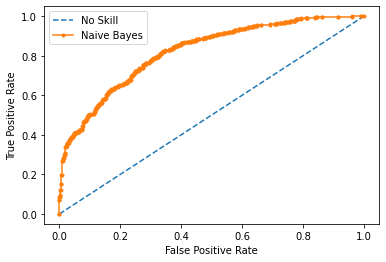

Logistic ROC AUC=0.842


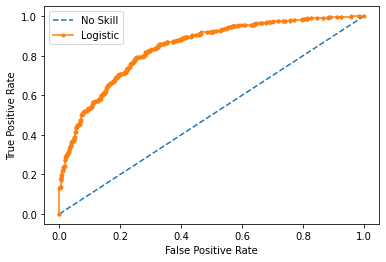

SVC ROC AUC=0.823


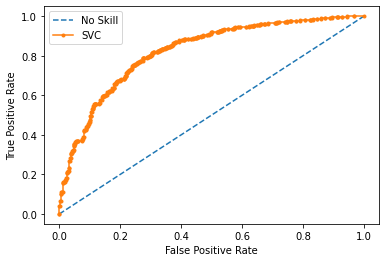

In [178]:
ROC_AUC(MultinomialNB(), X_train, y_train, X_test, y_test, 'Naive Bayes')
ROC_AUC(LogisticRegression(), X_train, y_train, X_test, y_test, 'Logistic')
ROC_AUC(CalibratedClassifierCV(LinearSVC()), X_train, y_train, X_test, y_test, 'SVC')

## Conclusion
- Three models have been tested for their performance and Logisic regression had the highest accuracy rate and AUC score. (CountVectorizer - Unigram - Logisitc Regression)
- The objective was to get the best Precision and Recall score for both classes (Positve and Negative Sentiment) and no threshold shift was used (not alternating the threshold - TPR vs FPR)
- Further Improvement can be done using hyperparameter tunning, however we will be comparing with Neural Network (Recurrent)